# Kaggle Project

## GTZAN Dataset - Music Genre Classification

**URL:** https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data

- 음악 트랙의 오디오 신호 분석 정보를 담고 있으며, 각 트랙의 다양한 음향 특성(예: 크로마 특성, 멜로디, 리듬 등)을 수치화한 통계값들을 포함하고 있다.

### Task

**연구배경**  

음원 또는 음악의 맥락에서 ```스펙트럴(Spectral) 분석```은 소리나 신호를 푸리에 변환으로 분석해 특징(feature)을 추출하는 작업이다.  
스펙트럴 분석의 결과는 수이며 이는 이미지로 시각화 될 수 있다.  
  
이러한 스펙트럴 분석은 음악 장르 분석에도 사용되는데, 추출 된 수리적인 값을 사용하여 분류한다.

기본적으로 방식인 ```의사결정나무(DesisionTree)```, ```서포트벡터머신(Support vector machine, SVM)```, ```로지스틱회귀(Logistic Regression)```, ```인공신경망(Neural Network)``` 성능을 비교하고,  ```스펙트럴이 시각화될 수 있다는 점에서 음악 장르 분류에 합성곱신경망(Convolutional Neural Networks, CNN)을 적용해 보고자 한다.```


**연구문제:**  

    1. 의사결정나무, 서포트벡터머신, 로지스틱회귀, 인공신경망, 합성곱신경망 중 가장 성능 좋은 모델은 무엇인가?
    2. 합성곱신경망(CNN)으로 음악 장르 분류를 수행할 수 있는가?  
    3. 음악 장르 분석에 있어서 CNN의 성능을 개선 시킬 수 있을까?

**Datasets**

* Dataset_path: Data\features_30_sec.csv (1000 rows × 60 columns)

| Dataset          | Percentage | Number of Data |
|------------------|------------|----------------|
| Train dataset    | 72%        | 720개          |
| Validation dataset | 18%        | 180개          |
| Test dataset     | 10%        | 100개          |


**Features(x):** in 의사결정나무(DesisionTree), 서포트벡터머신(Support vector machine, SVM), 로지스틱회귀(Logistic Regression), 인공신경망(Neural Network)

| Column Name               | Description (Eng)                                  | Description (Kor)                        |
|---------------------------|----------------------------------------------------|------------------------------------------|
| filename                  | Name of the music file                             | 음악 파일의 이름                         |
| length                    | Length of the audio file                           | 오디오 파일의 길이                       |
| chroma_stft_mean          | Mean of chroma short-term Fourier transform       | 크로마 단기 푸리에 변환의 평균           |
| chroma_stft_var           | Variance of chroma short-term Fourier transform   | 크로마 단기 푸리에 변환의 분산           |
| rms_mean                  | Mean of root mean square                          | 평균 제곱근(Root Mean Square)의 평균     |
| rms_var                   | Variance of root mean square                      | 평균 제곱근의 분산                       |
| spectral_centroid_mean    | Mean of spectral centroid                         | 스펙트럴 센트로이드의 평균               |
| spectral_centroid_var     | Variance of spectral centroid                     | 스펙트럴 센트로이드의 분산               |
| spectral_bandwidth_mean   | Mean of spectral bandwidth                        | 스펙트럴 대역폭의 평균                   |
| spectral_bandwidth_var    | Variance of spectral bandwidth                    | 스펙트럴 대역폭의 분산                   |
| rolloff_mean              | Mean of spectral rolloff                          | 스펙트럴 롤오프의 평균                   |
| rolloff_var               | Variance of spectral rolloff                      | 스펙트럴 롤오프의 분산                   |
| zero_crossing_rate_mean   | Mean of zero crossing rate                        | 제로 크로싱 비율의 평균                  |
| zero_crossing_rate_var    | Variance of zero crossing rate                    | 제로 크로싱 비율의 분산                  |
| harmony_mean              | Mean of harmony                                   | 하모니의 평균                            |
| harmony_var               | Variance of harmony                               | 하모니의 분산                            |
| perceptr_mean             | Mean of perceptron                                | 퍼셉트론의 평균                          |
| perceptr_var              | Variance of perceptron                            | 퍼셉트론의 분산                          |
| tempo                     | Tempo                                             | 템포                                     |
| mfcc[1-20]_mean           | Mean of Mel-frequency cepstral coefficients 1-20  | 멜 주파수 켑스트럴 계수(MFCC) 1부터 20까지의 평균 |
| mfcc[1-20]_var            | Variance of Mel-frequency cepstral coefficients 1-20 | MFCC 1부터 20까지의 분산                 |
| label                     | Label (genre)                                     | 레이블 (장르)                            |

**Features(x):** in 합성곱신경망(CNN)

| Image Property    | Value               |
|-------------------|---------------------|
| Number of Image   | 1000       |
| Image Shape       | (432, 288, 4)       |


| Genre Directory                    | Number of Images |
|------------------------------------|------------------|
| `data/images_original/blues`       | 100              |
| `data/images_original/classical`   | 100              |
| `data/images_original/country`     | 100              |
| `data/images_original/disco`       | 100              |
| `data/images_original/hiphop`      | 100              |
| `data/images_original/jazz`        | 100              |
| `data/images_original/metal`       | 100              |
| `data/images_original/pop`         | 100              |
| `data/images_original/reggae`      | 100              |
| `data/images_original/rock`        | 100              |

**Target(y):**

| Index | Label      |
|-------|------------|
| 1     | blues      |
| 2     | classical  |
| 3     | country    |
| 4     | disco      |
| 5     | hiphop     |
| 6     | jazz       |
| 7     | metal      |
| 8     | pop        |
| 9     | reggae     |
| 10    | rock       |


---

## Model Building

### Set-up

In [467]:
# 환경 구성
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import random
    from glob import glob
    
    from sklearn import preprocessing
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    
    import warnings
    warnings.filterwarnings("ignore") ## deprecated 경고 무시용
    import torch, torchvision
    import torch.nn as nn
    import torch.optim as optim
    from torchvision import datasets, transforms, models
    from torch.utils.data import TensorDataset, DataLoader, random_split
except:
    %pip install numpy seaborn pandas matplotlib torch torchvision scikit-learn

### Data preprocessing

#### Data preprocessing for 의사결정나무(DesisionTree), 서포트벡터머신(SVM), 로지스틱회귀(LogisticRegression), 인공신경망(Neural Networks)

In [468]:
# 데이터 예시 확인
df_data = pd.read_csv("Data/features_30_sec.csv") 
print(f"[df_data.shape]\n{df_data.shape}\n")
print(f"[df_data.columns]\n{df_data.columns}\n") ## 데이터 변수 확인
print("[df_data.head()]")
df_data.head()

[df_data.shape]
(1000, 60)

[df_data.columns]
Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean',

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

<Axes: xlabel='label', ylabel='Count'>

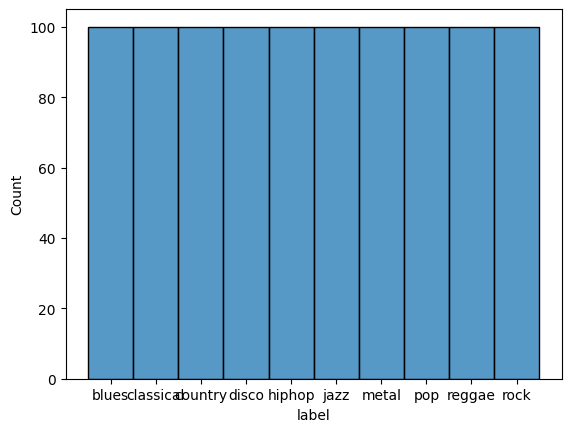

In [469]:
# 데이터의 균질함 확인
sns.histplot(df_data, x = 'label')

<Axes: >

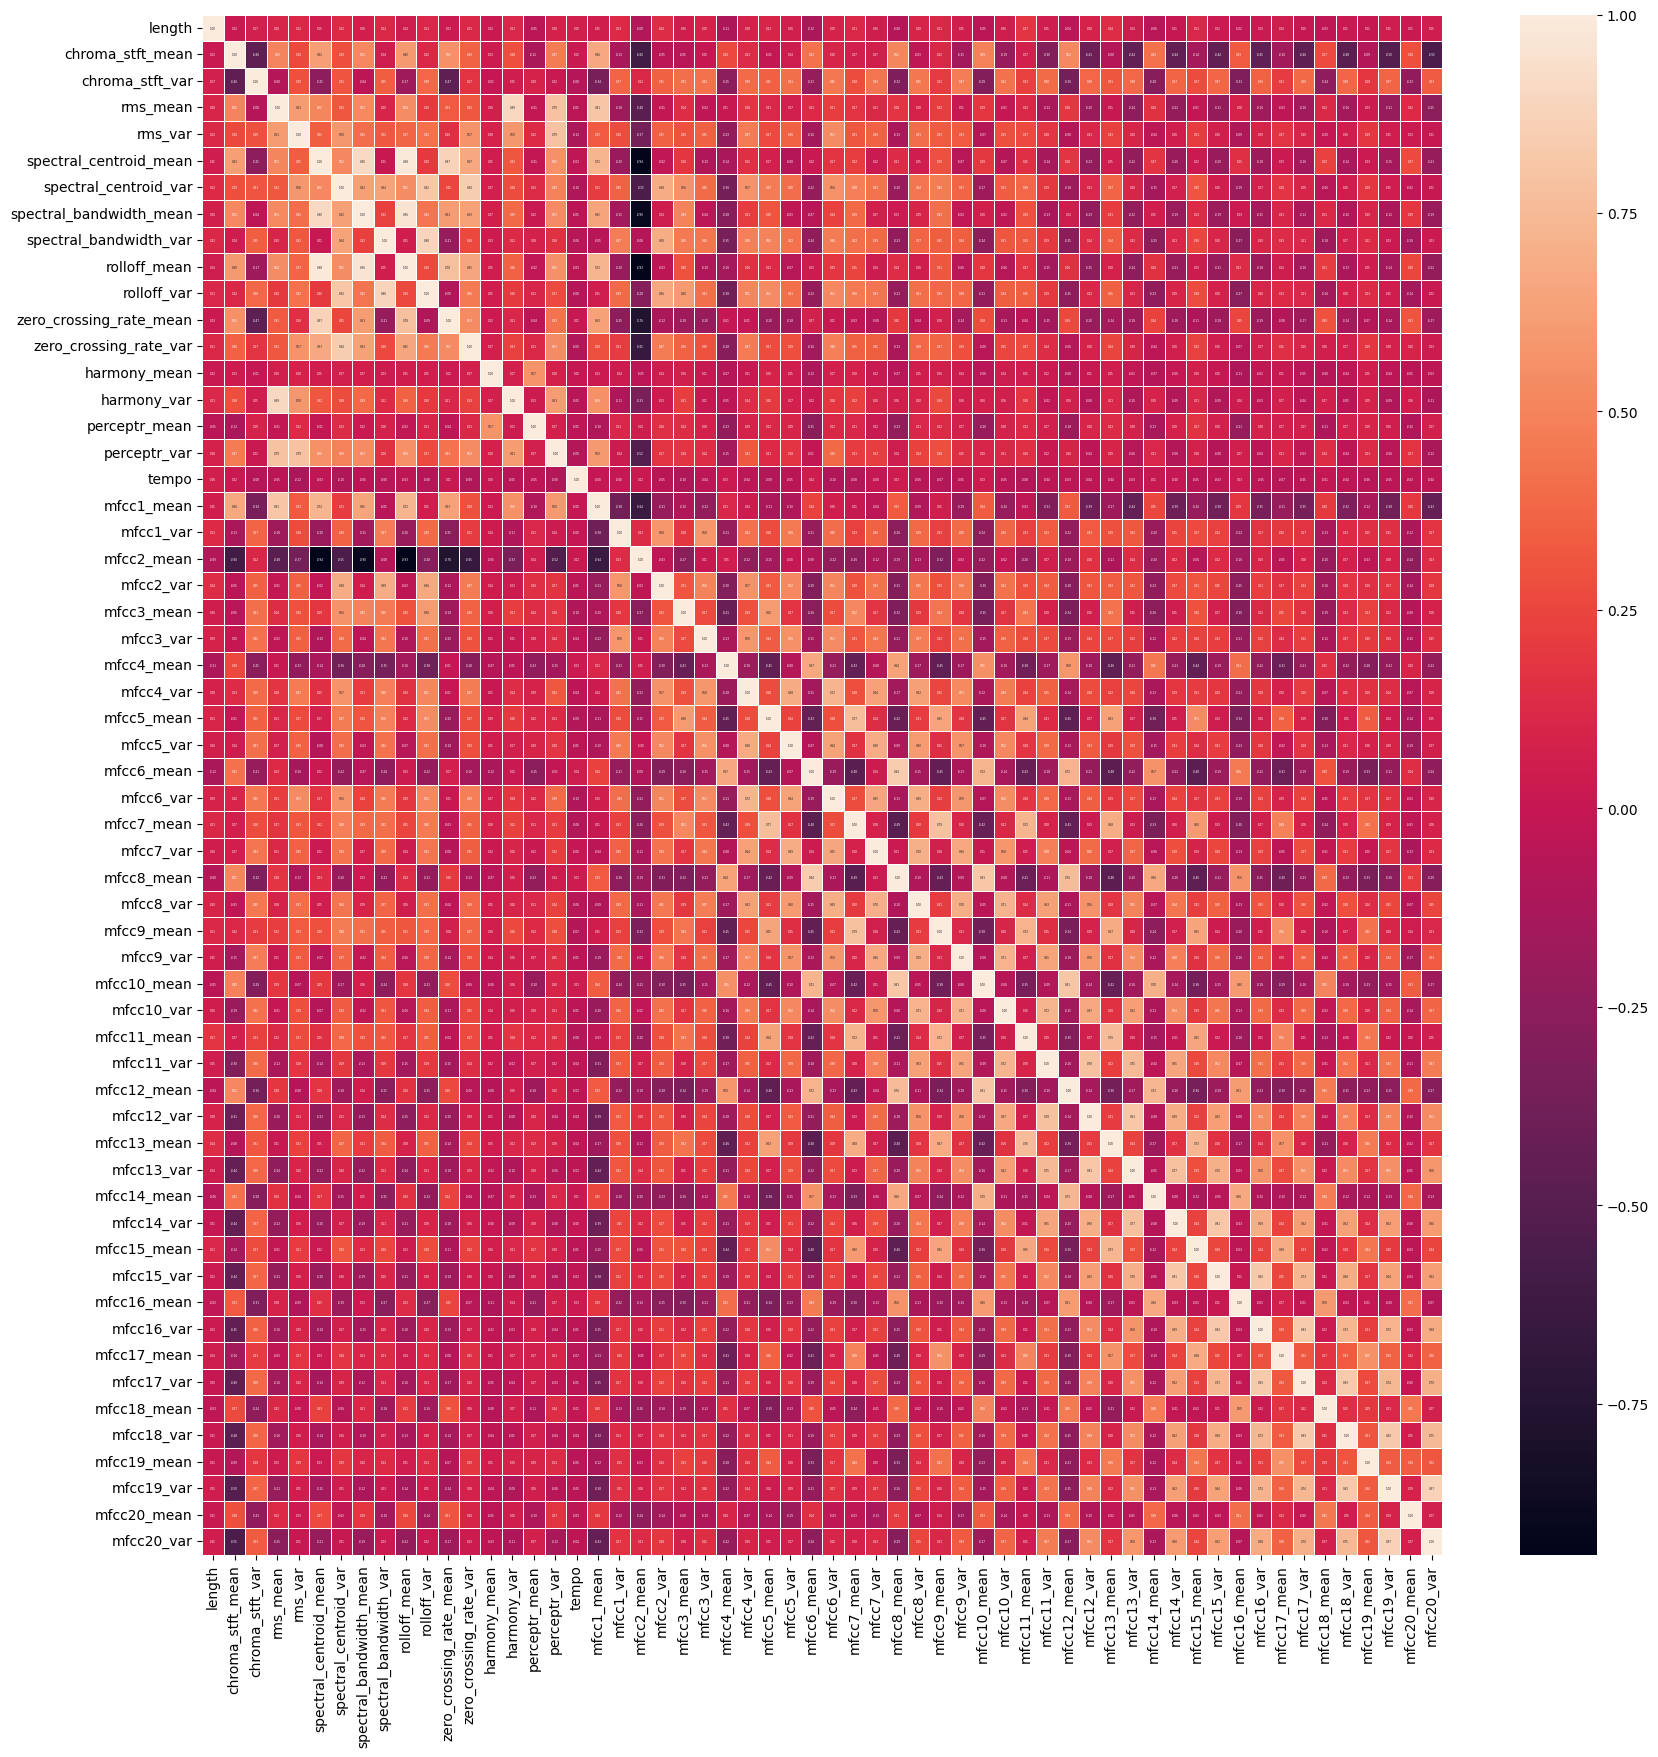

In [470]:
df_data_corr = df_data.select_dtypes(include=[np.number]).corr() ## 숫자 데이터만 추출
plt.figure(figsize=(20, 20))
sns.heatmap(df_data_corr, annot = True, linewidths = 0.5, fmt = '0.2f', annot_kws = {"size" : 2})

In [471]:
# 학습, 평가, 검증 데이터 구성
df_shuffled = df_data.sample(frac=1).reset_index(drop=True)
df_train_val_data, df_test_data = train_test_split(df_shuffled, test_size=0.1)
df_train_data, df_val_data = train_test_split(df_train_val_data, test_size=0.2)

In [472]:
df_train_data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
165      metal.00041.wav  661794          0.456134         0.075901  0.097609   
851      disco.00041.wav  661794          0.355709         0.089576  0.175499   
641  classical.00080.wav  661794          0.437906         0.094107  0.005276   
121    country.00097.wav  661794          0.348078         0.089503  0.153142   
431    country.00060.wav  661794          0.342078         0.088281  0.141031   
..                   ...     ...               ...              ...       ...   
796  classical.00084.wav  661794          0.245793         0.080236  0.022011   
945        pop.00066.wav  661504          0.354198         0.085136  0.243425   
535  classical.00090.wav  661794          0.215901         0.084828  0.023853   
433     hiphop.00005.wav  661504          0.490562         0.081425  0.261720   
354     reggae.00028.wav  661794          0.487689         0.085418  0.072866   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
165  0.000364             2269.128009          135794.165072   
851  0.003428             1776.084333          619392.460611   
641  0.000030              971.777391           94103.177831   
121  0.002850             1560.970440          581674.602930   
431  0.001713             1373.672818          521641.850339   
..        ...                     ...                    ...   
796  0.000195             1001.738330           24383.040142   
945  0.006666             2844.878579          909700.839930   
535  0.000108             2172.138293          132911.295981   
433  0.005380             2709.304332          248431.637847   
354  0.001759             1640.702891          794082.078167   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
165              1928.953538            88450.196573  ...   40.836742   
851              2452.269279           308231.408446  ...   41.721691   
641              1614.749295           207167.296701  ...   14.534595   
121              1782.663018           167419.080783  ...   60.317062   
431              1930.766586           299757.143687  ...   62.958878   
..                       ...                     ...  ...         ...   
796              1151.327553            22506.264466  ...   50.106270   
945              3219.559812           191044.218308  ...   74.664574   
535              1883.350066            41750.347543  ...  120.820030   
433              2510.733453            48424.302093  ...   43.264610   
354              1907.194610           220640.503415  ...   40.268814   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
165   -12.668804   40.830875    -0.556885   31.079792   -11.754225   
851    -5.759640   49.451294     0.707102   39.217903     0.269818   
641     4.332311   13.931521     3.357461   15.662603     2.624509   
121    -3.511001   75.597191     2.115774   65.967529     2.100000   
431    -5.255495   96.202507     3.960803   67.013702    -3.129460   
..           ...         ...          ...         ...          ...   
796    -1.851626   59.487999    -2.262538   50.350597    -1.277916   
945    -4.290574   83.948898    -1.566702   64.973801    -0.063697   
535     9.968451   92.055252     9.206622  105.878502     2.806015   
433    -3.696897   41.855061     6.240695   45.425587    -2.578554   
354    -4.196731   39.033272     1.403948   43.582146    -0.262044   

     mfcc19_var  mfcc20_mean  mfcc20_var      label  
165   37.405830    -1.540814   30.325340      metal  
851   41.051395    -2.286904   46.264408      disco  
641   20.659353     1.659115   23.679209  classical  
121   58.774887    -0.101300   62.809589    country  
431   76.887535    -4.378943   67.000824    country  
..          ...          ...         ...        ...  
796   66.314857    -0.445498   51.861156  classical  
945   90.609505     2.656700   95.577934        pop  
535  125.604340    -5.388985  210.667099  classical  
433   38.276657 

In [473]:
df_val_data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
974      pop.00048.wav  661504          0.465091         0.084325  0.156646   
321     jazz.00013.wav  661794          0.314325         0.088912  0.055482   
904    metal.00045.wav  661794          0.430214         0.081088  0.088064   
453   hiphop.00038.wav  675808          0.398340         0.095135  0.269860   
111   reggae.00037.wav  661794          0.517601         0.085245  0.086492   
..                 ...     ...               ...              ...       ...   
547   hiphop.00080.wav  661504          0.403840         0.097620  0.141423   
637  country.00098.wav  661794          0.270818         0.086876  0.176322   
820    blues.00043.wav  661794          0.398921         0.085154  0.127386   
953     jazz.00061.wav  666820          0.370261         0.084651  0.231890   
308  country.00027.wav  661794          0.391828         0.082007  0.116644   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
974  0.004200             4052.637359           1.101301e+06   
321  0.000310             1789.982726           8.787790e+04   
904  0.000997             2390.257225           3.666028e+05   
453  0.019041             2208.645681           7.392213e+05   
111  0.002803             1709.758012           5.240084e+05   
..        ...                     ...                    ...   
547  0.000649             3377.753402           8.194760e+05   
637  0.003653             1425.010296           2.680978e+05   
820  0.001321             2155.879629           1.880519e+05   
953  0.001459             2454.905302           2.185008e+05   
308  0.001036             2011.642324           1.811839e+05   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
974              3426.408610           153232.986134  ...   57.392250   
321              2312.885935            48958.434409  ...   84.707123   
904              2027.698032           119203.408704  ...   80.265953   
453              2215.028676           592713.065641  ...   51.963490   
111              2068.263790           191166.949814  ...   63.609333   
..                       ...                     ...  ...         ...   
547              2997.025253           136532.866941  ...   60.614422   
637              1690.948858           119640.688974  ...   70.231689   
820              2372.127374            60288.408927  ...   38.373833   
953              2656.832951            84736.461839  ...   37.653946   
308              2140.356810           168320.144926  ...   38.010822   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
974    -0.911696   56.437584     2.039834   60.173218     2.287221   
321    -2.782915   80.865334     1.273962   59.723904    -0.347826   
904    -8.739609  109.469666     2.116250  101.827110    -8.552918   
453     0.691360   50.360996     1.088015   47.029404    -1.116192   
111    -3.378154   36.300652     0.784370   47.358162    -6.179020   
..           ...         ...          ...         ...          ...   
547    -0.832116   74.233589     4.851249   53.029705     0.242057   
637    -4.184361   78.628334     1.386218   69.707001     2.436887   
820    -6.748965   45.289101     1.411347   75.830956    -3.969472   
953    -5.362904   42.557713    -0.069673   36.102852    -1.157246   
308   -10.224055   42.249950   -10.540270   40.994244    -5.738250   

     mfcc19_var  mfcc20_mean  mfcc20_var    label  
974   81.885208     3.465456   62.379543      pop  
321   60.870331     0.359693   73.107010     jazz  
904   85.032974     0.218107   51.859085    metal  
453   49.191540    -3.269727   62.150864   hiphop  
111   38.154358    -2.971719   40.702641   reggae  
..          ...          ...         ...      ...  
547   40.654781    -4.865187   51.150837   hiphop  
637   70.288208    -3.615434   63.632908  country  
820   40.654411     3.283833   68.128830    blues  
953   44.098770    -0.042553   55.500191     jazz  
308   

In [474]:
df_test_data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
46       disco.00039.wav  661794          0.341053         0.089114  0.124331   
401     reggae.00063.wav  661504          0.416079         0.089835  0.097602   
172     reggae.00022.wav  661794          0.455532         0.087992  0.182237   
931      blues.00014.wav  661794          0.329036         0.108111  0.067055   
672     hiphop.00021.wav  661794          0.430004         0.084345  0.241940   
..                   ...     ...               ...              ...       ...   
238  classical.00086.wav  661794          0.312068         0.081500  0.031510   
21        jazz.00075.wav  661794          0.293696         0.086162  0.146971   
686    country.00022.wav  661794          0.321503         0.090334  0.075157   
337      blues.00092.wav  661794          0.390914         0.100480  0.063084   
837      disco.00077.wav  661504          0.415682         0.084023  0.206738   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
46   0.001300             2327.861966          338215.023401   
401  0.002224             1910.704517          503885.686631   
172  0.002158             2058.821621          243453.305099   
931  0.002717             1171.848227          147278.545893   
672  0.005362             2406.175124          521674.821774   
..        ...                     ...                    ...   
238  0.000357             1356.154928          220765.513081   
21   0.004145             2902.086088          335667.628888   
686  0.001027             1719.309237          175855.475699   
337  0.001534              918.585169          522858.836179   
837  0.004981             2309.203496          369567.921322   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
46               2431.187708           257338.351483  ...   67.557220   
401              2115.320454           340165.543316  ...   43.018116   
172              2227.187289            97743.987536  ...   33.814507   
931              1705.519299            96584.443367  ...   67.754112   
672              2268.950988            90745.726883  ...   64.561111   
..                       ...                     ...  ...         ...   
238              1494.645967           165633.668701  ...   56.694744   
21               2854.682005           153140.633326  ...   55.656425   
686              2142.286763           107310.579274  ...   61.075546   
337              1437.735910           193517.118110  ...   60.843918   
837              2278.111986            96482.498945  ...   44.960487   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
46      3.339082   78.740372     5.191255   95.645203     2.875484   
401     0.813143   43.976070     3.004575   43.315086     1.518349   
172     0.353993   52.409283    10.113239   37.867146    -0.427978   
931     0.054863   96.668579    -3.722265   65.745132    -0.994969   
672    -5.749485   77.597412    10.312733   76.459892     3.633078   
..           ...         ...          ...         ...          ...   
238    -0.446823   68.714836     1.903679   56.369431    -0.119083   
21     -3.021665   58.243416    -2.463421   43.542133    -1.034237   
686    -6.543632   42.860062   -10.044154   46.806343    -7.260338   
337    -3.900184   72.750015    -4.195145   43.192543    -5.923442   
837    -8.047240   45.676350     1.662757   48.148952    -6.017945   

     mfcc19_var  mfcc20_mean  mfcc20_var      label  
46    89.754135     3.185143  123.099915      disco  
401   40.269886     2.449220   44.925354     reggae  
172   47.963860     1.300942   61.440659     reggae  
931   89.352570    -1.800289  113.520569      blues  
672   95.104080     9.203171  103.442505     hiphop  
..          ...          ...         ...        ...  
238   59.007130    -2.804025   50.342323  classical  
21    77.116264    -5.114805   93.542183       jazz  
686   46.877838    -4.016179   44.518856    country  
337   45.393414 

#### Data preprocessing for 합성곱신경망(CNN)

[Image_01] Data/images_original\blues\blues00012.png | Shape(288, 432, 4)
[Image_02] Data/images_original\classical\classical00038.png | Shape(288, 432, 4)
[Image_03] Data/images_original\country\country00079.png | Shape(288, 432, 4)
[Image_04] Data/images_original\disco\disco00020.png | Shape(288, 432, 4)
[Image_05] Data/images_original\hiphop\hiphop00009.png | Shape(288, 432, 4)
[Image_06] Data/images_original\jazz\jazz00023.png | Shape(288, 432, 4)
[Image_07] Data/images_original\metal\metal00078.png | Shape(288, 432, 4)
[Image_08] Data/images_original\pop\pop00028.png | Shape(288, 432, 4)
[Image_09] Data/images_original\reggae\reggae00086.png | Shape(288, 432, 4)
[Image_10] Data/images_original\rock\rock00056.png | Shape(288, 432, 4)


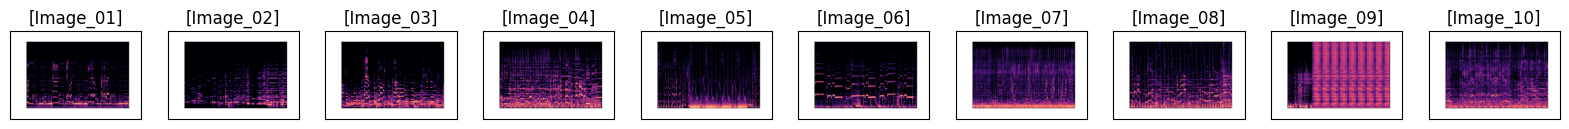

In [475]:
# 데이터 예시 출력
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 20))
for i_category, e_category in enumerate(glob("Data/images_original/*")):
    image_path = random.choice(glob(f"{e_category}/*"))
    image = plt.imread(image_path)
    print(f"[Image_{str(i_category+1).zfill(2)}] {image_path} | Shape{image.shape}") ## 이미지 크기는 모두 (288, 432, 4)
    ax[i_category].set_title(f"[Image_{str(i_category+1).zfill(2)}]")
    ax[i_category].set_xticks([]) ## X축 눈금 제거
    ax[i_category].set_yticks([]) ## Y축 눈금 제거
    ax[i_category].grid(False)    ## 격자 제거
    ax[i_category].imshow(image)
plt.show()

In [476]:
# 학습, 평가, 검증 데이터 구성
img_dataset = glob("Data/images_original/*/*")
print(f"Total images: {len(img_dataset)}")

Total images: 1000


### Model Construction

#### 의사결정나무, 서포트벡터머신, 로지스틱회귀 모델 공통 부분 구성

In [477]:
# 입력 X 구성
X_train = df_train_data.drop(['label', 'filename'], axis=1) ## 학습에 불필요한 'label'과 'filename'을 제외
X_val = df_val_data.drop(['label', 'filename'], axis=1) ## 학습에 불필요한 'label'과 'filename'을 제외
X_test = df_test_data.drop(['label', 'filename'], axis=1) ## 학습에 불필요한 'label'과 'filename'을 제외

# 결과 y 구성
y_train = df_train_data['label']
y_val = df_val_data['label']
y_test = df_test_data['label']

# X_train, X_val, X_test에 대해서 Min-Max 스케일링 적용
min_max_scaler = preprocessing.MinMaxScaler() 
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
X_test_scaled = min_max_scaler.transform(X_test)

# 학습된 스케일러를 이용하여 스케일링된 데이터로 DataFrame 재생성
cols = df_train_data.drop(['label', 'filename'], axis=1).columns ## 학습에 불필요한 'label'과 'filename'을 제외
X_train = pd.DataFrame(X_train_scaled, columns=cols)
X_val = pd.DataFrame(X_val_scaled, columns=cols)
X_test = pd.DataFrame(X_test_scaled, columns=cols)

# 모델 학습 및 검증 데이터에 대한 평가
def fit_evaluate_model_for_tree_svm_logireg(model, X_train, y_train, X_val, y_val, title="Default"):
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    val_accuracy = round(accuracy_score(y_val, val_preds), 5)
    print(f'Validation Accuracy {title}: {val_accuracy}\n')
    return model  # 훈련된 모델 반환

# 독립적인 테스트 데이터셋에 대한 모델 평가
def evaluate_test_model_for_tree_svm_logireg(model, X_test, y_test, title="Default"):
    test_preds = model.predict(X_test)
    test_accuracy = round(accuracy_score(y_test, test_preds), 5)
    print(f'Test Accuracy {title}: {test_accuracy}\n')

#### 의사결정나무 모델 구성


In [478]:
df_tree = DecisionTreeClassifier()

#### 서포트 벡터 머신 모델 구성

In [479]:
df_svm = SVC(decision_function_shape="ovo") ## 2개씩 쌍으로 10개의 분류 문제로 생각

#### 로지스틱 회귀 모델 구성

In [480]:
df_lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

#### 신경망 모델 구성

In [535]:
# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 레이블을 수치형으로 인코딩
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# 데이터를 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train.values).float().to(device)
X_val_tensor = torch.tensor(X_val.values).float().to(device)
X_test_tensor = torch.tensor(X_test.values).float().to(device)
y_train_tensor = torch.tensor(y_train_encoded).long().to(device)
y_val_tensor = torch.tensor(y_val_encoded).long().to(device)
y_test_tensor = torch.tensor(y_test_encoded).long().to(device)

# 데이터 로더 설정
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 신경망 모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 5000)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(5000, 10)
        self.output = nn.Linear(10, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.output(out)
        return out

# 모델 평가 함수 수정
def evaluate_model_for_nn(model, X_tensor, y_tensor):
    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_tensor).sum().item() / y_tensor.size(0)
    return accuracy  # 정확도 반환

# 모델 학습 및 검증 데이터에 대한 평가
def train_and_evaluate_model(model, criterion, optimizer, train_loader, val_tensor, val_labels, num_epochs):
    best_val_accuracy = 0
    for epoch in range(num_epochs):
        model.train()  # 모델을 학습 모드로 설정
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # 검증 데이터셋으로 모델 평가
        val_accuracy = evaluate_model_for_nn(model, val_tensor, val_labels)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')
        
        # 모델 성능이 개선되었다면 저장
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model.state_dict()  # 현재의 모델 상태를 저장

    return best_model

#### 합성곱 모델 구성

In [534]:
# 모델 정의
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 54 * 36, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# 학습 함수
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)

        # 평가
        model.eval()
        val_running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_loss = val_running_loss / len(val_loader)
        val_accuracy = correct / total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train loss: {train_loss:.4f}')
        print(f'Validation loss: {val_loss:.4f}')
        print(f'Validation accuracy: {val_accuracy:.4f}')
        
    print('Finished Training')

# 모델 평가 및 결과 추출
def evaluate_pytorch_model(model, data_loader, device):
    model.eval()  # 평가 모드로 설정
    y_true = []
    y_pred = []
    y_scores = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())
    return np.array(y_true), np.array(y_pred), np.array(y_scores)

### Train Model & Select Model

#### 의사결정나무 모델 학습 및 평가

In [521]:
# 의사결정나무 모델 학습
tree_trained_model = fit_evaluate_model_for_tree_svm_logireg(df_tree, X_train, y_train, X_val, y_val, "Decision trees")

Validation Accuracy Decision trees: 0.60556



#### 서포트벡터머신 모델 학습 및 평가

In [527]:
svm_trained_model = fit_evaluate_model_for_tree_svm_logireg(df_tree, X_train, y_train, X_val, y_val, "Support Vector Machine")

Validation Accuracy Support Vector Machine: 0.6



#### 회귀 모델 학습 및 평가

In [524]:
re_trained_model = fit_evaluate_model_for_tree_svm_logireg(df_tree, X_train, y_train, X_val, y_val, "Logistic Regression") ## 의사결정나무 모델 학습 및 평가

Validation Accuracy Logistic Regression: 0.57778



#### 신경망 모델 학습 및 평가

In [536]:
# 모델 인스턴스 생성
model_nn = NeuralNetwork(X_train.shape[1], len(label_encoder.classes_)).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_nn.parameters(), lr=0.01)

# 모델 학습 및 검증 데이터셋을 사용하여 평가
best_model_state = train_and_evaluate_model(model_nn, criterion, optimizer, train_loader, X_val_tensor, y_val_tensor, num_epochs=5000)
model_nn.load_state_dict(best_model_state) ## NN 중에 최고 성능 모델을 불러옴

Epoch [1/5000], Loss: 2.2928, Val Accuracy: 0.1278
Epoch [2/5000], Loss: 2.2899, Val Accuracy: 0.1722
Epoch [3/5000], Loss: 2.3284, Val Accuracy: 0.1722
Epoch [4/5000], Loss: 2.2114, Val Accuracy: 0.1778
Epoch [5/5000], Loss: 2.3925, Val Accuracy: 0.1500
Epoch [6/5000], Loss: 2.3469, Val Accuracy: 0.1556
Epoch [7/5000], Loss: 2.1787, Val Accuracy: 0.1611
Epoch [8/5000], Loss: 2.3011, Val Accuracy: 0.1389
Epoch [9/5000], Loss: 2.2478, Val Accuracy: 0.2111
Epoch [10/5000], Loss: 2.2993, Val Accuracy: 0.2333
Epoch [11/5000], Loss: 2.2081, Val Accuracy: 0.2056
Epoch [12/5000], Loss: 2.1936, Val Accuracy: 0.1611
Epoch [13/5000], Loss: 2.1024, Val Accuracy: 0.2389
Epoch [14/5000], Loss: 2.1796, Val Accuracy: 0.1722
Epoch [15/5000], Loss: 2.2437, Val Accuracy: 0.1722
Epoch [16/5000], Loss: 2.2269, Val Accuracy: 0.1778
Epoch [17/5000], Loss: 2.1158, Val Accuracy: 0.1778
Epoch [18/5000], Loss: 2.1939, Val Accuracy: 0.2500
Epoch [19/5000], Loss: 2.1070, Val Accuracy: 0.2222
Epoch [20/5000], Loss

<All keys matched successfully>

#### 합성곱신경망 모델 학습 및 평가

In [491]:
# 데이터 디렉토리 설정
data_dir = 'Data/images_original'  # 데이터셋 경로 설정
image_size = (432, 288)  # Example size, adjust to your dataset
batch_size = 16  
num_classes = 10  
num_epochs = 10 

# 이미지 변환 설정
image_transforms = {
    'train': transforms.Compose([
        transforms.Resize(image_size),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'val': transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }

# 데이터셋 로드 및 분할
dataset = datasets.ImageFolder(data_dir, transform=image_transforms['train'])
train_size = int(0.72 * len(dataset))
val_size = int(0.18 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 데이터 로더 설정
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 모델 인스턴스 생성
model = CNN(num_classes).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 모델을 학습 및 검증 데이터셋에 대해 학습
train(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# 평가 데이터 로더에서 모델 평가
y_true, y_pred, y_scores = evaluate_pytorch_model(model, val_loader, device)

Epoch 1/10
Train loss: 2.3080
Validation loss: 2.3017
Validation accuracy: 0.1000
Epoch 2/10
Train loss: 2.3075
Validation loss: 2.3019
Validation accuracy: 0.1000
Epoch 3/10
Train loss: 2.3074
Validation loss: 2.3018
Validation accuracy: 0.1000
Epoch 4/10
Train loss: 2.3072
Validation loss: 2.3019
Validation accuracy: 0.1000
Epoch 5/10
Train loss: 2.3068
Validation loss: 2.3020
Validation accuracy: 0.1000
Epoch 6/10
Train loss: 2.3069
Validation loss: 2.3020
Validation accuracy: 0.1000
Epoch 7/10
Train loss: 2.3073
Validation loss: 2.3020
Validation accuracy: 0.1000
Epoch 8/10
Train loss: 2.3068
Validation loss: 2.3019
Validation accuracy: 0.1000
Epoch 9/10
Train loss: 2.3068
Validation loss: 2.3020
Validation accuracy: 0.1000
Epoch 10/10
Train loss: 2.3064
Validation loss: 2.3023
Validation accuracy: 0.1000
Finished Training


---

## Performance

[Decision trees]
Test Accuracy Decision trees: 0.53

[Support Vector Machine]
Test Accuracy Support Vector Machine: 0.59

[Logistic Regression]
Test Accuracy Logistic Regression: 0.55

[Neural Network]
0.71

[Convolutional Neural Network]
Accuracy Score: 0.10

In [522]:
print("[Decision trees]")
evaluate_test_model_for_tree_svm_logireg(tree_trained_model, X_test, y_test, "Decision trees") ## 테스트 데이터셋에서 평가

[Decision trees]
Test Accuracy Decision trees: 0.53



In [528]:
print("[Support Vector Machine]")
evaluate_test_model_for_tree_svm_logireg(svm_trained_model, X_test, y_test, "Support Vector Machine") ## 테스트 데이터셋에서 평가


[Support Vector Machine]
Test Accuracy Support Vector Machine: 0.59



In [525]:
print("[Logistic Regression]")
evaluate_test_model_for_tree_svm_logireg(re_trained_model, X_test, y_test, "Logistic Regression") ## 테스트 데이터셋에서 평가


[Logistic Regression]
Test Accuracy Logistic Regression: 0.55



In [542]:
print("[Neural Network]")
score_nn = evaluate_model_for_nn(model_nn, X_test_tensor, y_test_tensor) ## 테스트 데이터셋 평가
print(f"Test Accuracy Neural Network: {score_nn}")

[Neural Network]
Test Accuracy Neural Network: 0.71


In [539]:
print("[Convolutional Neural Network]")
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy Convolutional Neural Network: {accuracy:.2f}")

[Convolutional Neural Network]
Test Accuracy Convolutional Neural Network: 0.10


The results explains

**결론**

1. 의사결정나무, 서포트벡터머신, 인공신경망, 합성곱신경망 중 가장 성능 좋은 모델은 무엇인가?
- 의사결정나무, 서포트벡터머신, 로지스틱 회귀는 각각 0.53, 0.59, 0.55의 정확도이며 인공신경망이 0.71의 정확도로 가장 높은 성능을 보였다. 
- 음악 장르 분석에 있어서는 의사결정나무, 서포트벡터머신, 인공신경망, 합성곱신경망 중에는 인공신경망이 가장 효과적인 모델로 판단됩니다.

2. 합성곱신경망(CNN)으로 음악 장르 분류를 수행할 수 있는가?  
- 본 연구에 따르면 정확도는 10%이며, 음악 장르 분류에 적합한 모델이 아닌 것으로 확인되었다.
- 데이터 셋과 모델 구조에 다라 변동이 있을 수 있지만 스펙트럴의 시각화 이미지를 활용한 분류는 어려울 할 것으로 기대된다.

3. 음악 장르 분석에 있어서 CNN의 성능을 개선 시킬 수 있을까?
- 충분한 양의 레이블이 지정된 데이터를 확보하거나, 이미지의 크기를 늘려 좀더 많은 특징이 추출될 수 있도록 한다면 가능성이 있을 것으로 기대된다.